# imports

In [204]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

import librosa ## used to deal with audio files
import librosa.display

from IPython.display import Audio

# features

In [205]:
labels_df = pd.read_csv('../Data/filtered_data_labeled.tsv', sep='\t')
labels_df.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accent,label
0,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687170.mp3,He associated with the Formists.,2,1,fifties,female,us,3
1,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687171.mp3,"The ""ultra accelerator"" injection gives Derric...",2,1,fifties,female,us,3
2,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687172.mp3,"Despite running as a joke, candidates have won...",2,0,fifties,female,us,3
3,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687173.mp3,Stoner also guest-starred in the television dr...,2,0,fifties,female,us,3
4,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687174.mp3,Rainelle was named for the Raine family.,2,0,fifties,female,us,3


In [206]:
audio_path = '../Data/common_voice_en_19687170.mp3'
y, sr = librosa.load(audio_path)

In [207]:
Audio(data=y, rate=sr)

In [208]:
def show_waveform(audio, sr):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio, sr=sr)
    plt.title('waveform')
    plt.xlabel('time (s)')
    plt.ylabel("Amplitude")
    plt.show

def show_waveform_db(audio, sr):
    plt.figure(figsize=(10, 4))
    db = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    librosa.display.specshow(db, sr=sr, x_axis='time', y_axis='hz', cmap='coolwarm')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Waveform in dB')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

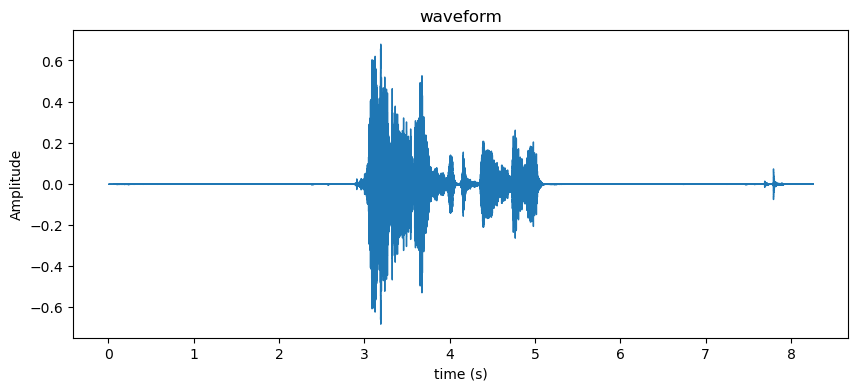

In [209]:
show_waveform(y, sr)

In [210]:
def unsilenced_audio(audio):
    unsilenced = []
    time_intervals = librosa.effects.split(audio, top_db=25, ref=np.max).tolist()
    for start, end in time_intervals:
        unsilenced += audio.tolist()[start:end+1]
    unsilenced = np.array(unsilenced)

    return unsilenced

In [211]:
y_unsilenced = unsilenced_audio(y)

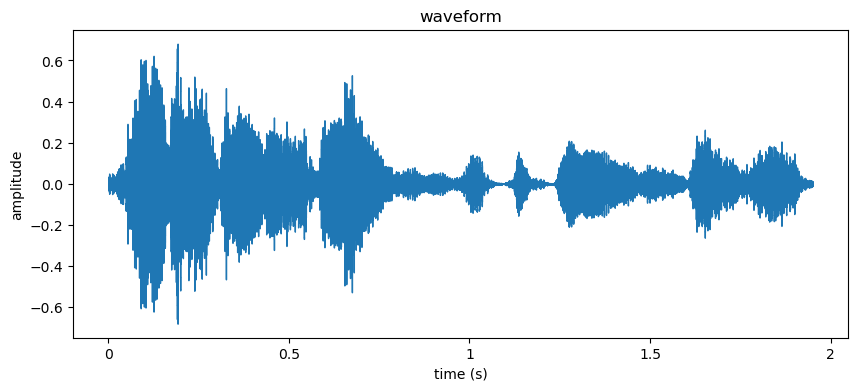

In [212]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_unsilenced, sr=sr)
plt.title('waveform')
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.show()

In [213]:
Audio(data=y_unsilenced, rate=sr)

## Dealing with different Loudness

In [214]:
import librosa
import numpy as np

def get_loudness(audio):
    rms = librosa.feature.rms(y=audio)[0]
    mean_rms = float(np.mean(rms))
    return mean_rms

In [215]:
from IPython.display import Audio

# If you have the file path
Audio(filename='../Data/common_voice_en_195777.mp3')

# Or if you have the audio data and sampling rate from librosa
import librosa
loud1, sr1 = librosa.load('../Data/common_voice_en_195777.mp3', sr=None, mono=True)
loud4 = loud1.copy()
Audio(data=loud1, rate=sr1)


In [216]:
print(get_loudness(loud1))

0.00012427200272213668


In [217]:
loud2, sr2 = librosa.load('../Data/common_voice_en_17304191.mp3', sr=None, mono=True)
loud3 = loud2.copy()
Audio(data=loud2, rate=sr2)

In [218]:
print(get_loudness(loud2))

0.47616061568260193


In [219]:
import numpy as np

def normalize_loudness(audio): 
    rms = np.sqrt(np.mean(audio**2))
    current_db = 20 * np.log10(rms)
    target_db = -20.0
    gain = target_db - current_db
    audio_normalized = audio * (10**(gain / 20))
    return audio_normalized

In [220]:
loud1 = normalize_loudness(loud1)

Audio(data=loud1, rate=sr1)

In [221]:
print(get_loudness(loud1))

0.049094539135694504


In [222]:
loud2 = normalize_loudness(loud2)

Audio(data=loud2, rate=sr2)

In [223]:
print(get_loudness(loud2))

0.08207220584154129


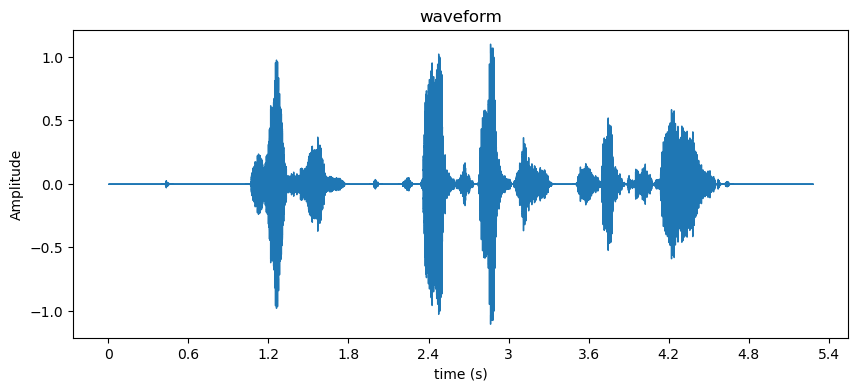

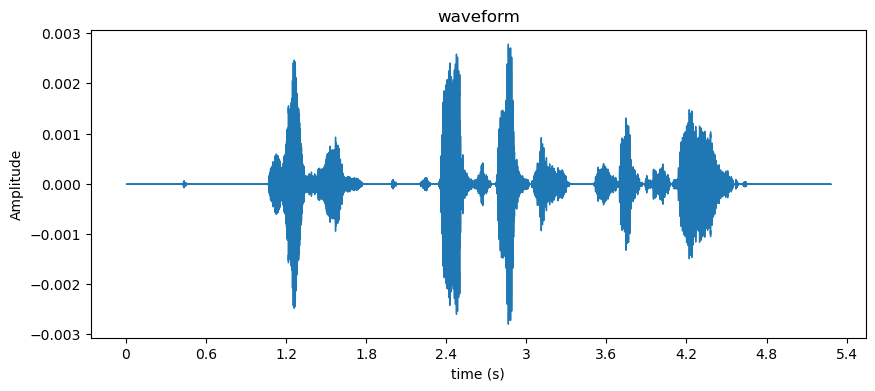

In [224]:
show_waveform(loud1, sr1)
show_waveform(loud4, sr1)

In [231]:
print(np.max(loud1), np.max(loud4))

1.101431 0.0027880298


In [232]:
print(np.max(loud2), np.max(loud3))

0.34537607 2.003778


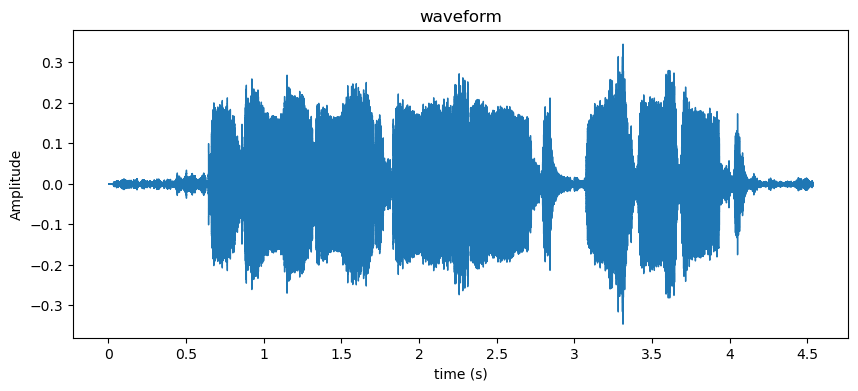

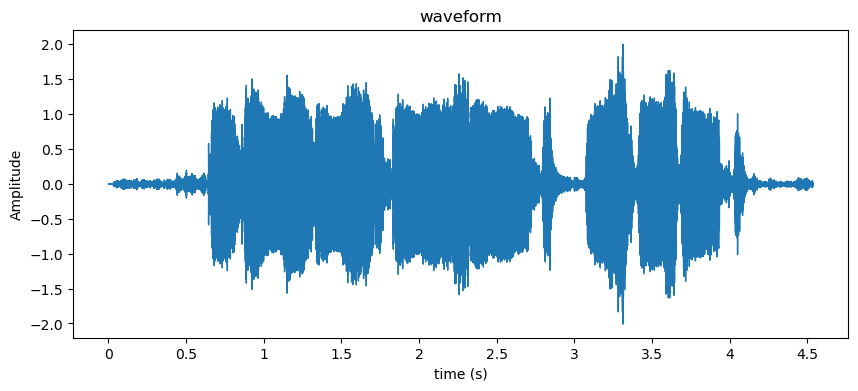

In [225]:
show_waveform(loud2, sr2)
show_waveform(loud3, sr2)

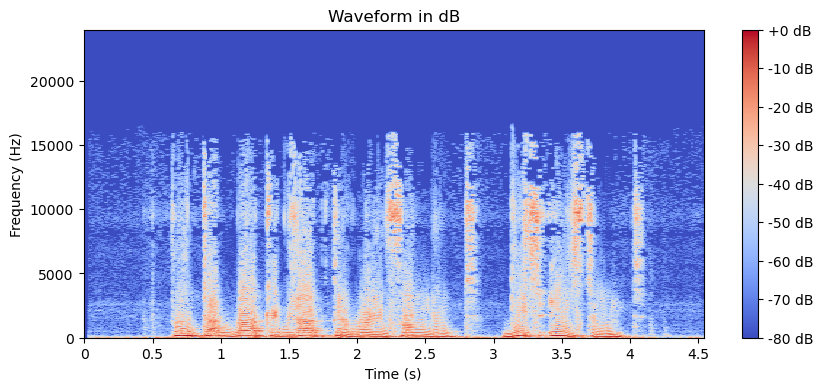

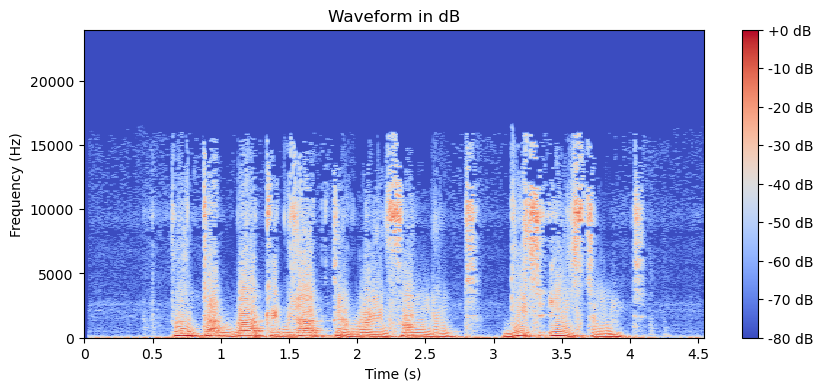

In [226]:
show_waveform_db(loud2, sr2)
show_waveform_db(loud3, sr2)

In [ ]:

def get_features_from_audio(audio_path: str) -> list:
    """
    add your feature extraction logic here
    """
    pass


def get_Dataframe(labels_df: pd.DataFrame, target_label: str) -> pd.DataFrame:
    """
    Process audio files listed in labels_df, extract features, and return a DataFrame
    """
    feature_name = [] ## list of feature names you used
    feature_length =[] ## list of feature lengths you used
    all_features=[] ## list of all actual features values
    columns = [] ## list of columns names for the DataFrame

    for index, row in labels_df.iterrows():
        audio_path = os.path.join('../Data/', row['path'])

        if os.path.isfile(audio_path):
            features = get_features_from_audio(audio_path)
            features.append(row[target_label])
            all_features.append(features)
        else:
            print(f"File not found: {audio_path}")

    # Automatically determine feature names based on length of feature vector
    if all_features:
        for i in range(len(feature_name)):
            columns.append([f"{feature_name[i]}_{j}" for j in range(feature_length[i])])
    else:
        features_names = []

    return pd.DataFrame(all_features, columns=features_names)